In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

# Add the src directory t\ the Python path

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# Now you can import the TimeSeriesDataset class
from src.TimeSeriesDataset import TimeSeriesDataset as TSD
from src.utils import download_data, weighted_mean
from src.mappings import value_mapping, ideology_mapping, social_complexity_mapping

In [2]:
# UTILS
def frontier(A):
    """
    FRONTIER finds all adjacent cells in a two-dimensional array A to true cells.
    
    Parameters:
    A (numpy.ndarray): A two-dimensional boolean array.
    
    Returns:
    tuple: Four boolean arrays representing the frontier in the North, South, West, and East directions.
    """
    m, n = A.shape

    # North
    fN = np.vstack((np.diff(A, axis=0) > 0, np.zeros((1, n), dtype=bool)))

    # South
    fS = np.vstack((np.zeros((1, n), dtype=bool), np.flipud(np.diff(np.flipud(A), axis=0) > 0)))

    # West
    fW = np.hstack((np.diff(A, axis=1) > 0, np.zeros((m, 1), dtype=bool)))

    # East
    fE = np.hstack((np.zeros((m, 1), dtype=bool), np.flipud(np.diff(np.flipud(A), axis=1) > 0)))

    return np.logical_or(np.logical_or(fN, fS), np.logical_or(fW, fE))

In [28]:
class polity():
    def __init__(self, id, inst = 0, ineq = 0, start_cell = [0,0], mapsize = 100):
        self.id = id
        self.inst = inst
        self.ineq = ineq
        self.size = 1
        self.start_cell = start_cell

        self.occupation = np.zeros((mapsize, mapsize))
        self.occupation[self.start_cell[0], self.start_cell[1]] = 1

    def expand(self, map):
        # find neumann neighbors
        F = frontier(self.occupation)
        F = F * map
        adversaries = np.unique(F)

        adversaries = adversaries[(adversaries != 0) & (adversaries != self.id)]
        return adversaries if len(adversaries) > 0 else None

    def evolve(self, incr_ineq):
        # CHECK FORMULAS
        self.ineq = min((self.ineq + incr_ineq*np.random.normal(1,1)), 1)
        self.inst = self.inst + np.random.normal(-5, 10)


class AGM():
    def __init__(self, mapsize = 100, n_thresh = 4, p_50 = 0.25):
        self.map = np.zeros((mapsize, mapsize))
        self.polities = {}

        self.n_thresh = n_thresh
        self.p_50 = p_50

    def add_polity(self, polity):
        self.polities[polity.id] = polity
        if np.shape(self.map) != np.shape(polity.occupation):
            raise ValueError('Map and polity occupation shape mismatch')
        self.map[polity.occupation == 1] = polity.id
    
    def expand(self, annex_prob = 0.25):
        new_map = self.map.copy()
        for polity in self.polities.values():
            if polity.size < self.n_thresh:
                pass
            adversaries = polity.expand(self.map)

            if len(adversaries) > 0:
                if np.random.rand() > annex_prob:
                    pass

                for a in adversaries:
                    adversary = self.polities[str(int(a))]
                    p_ratio = polity.size / adversaries.size
                    p_win = p_ratio/(self.p_50+p_ratio)
                    if np.random.rand() < p_win:
                        pass
                    else:
                        new_map[adversary.occupation == 1] = polity.id
                    pass
                
                pass
            else:
                # expand
                pass
        


In [26]:
map_size = 10
agm = AGM(mapsize = map_size)

for i in range(map_size):
    for j in range(map_size):
        agm.add_polity(polity(str(i*map_size+j), start_cell = [i,j], mapsize = map_size))


[ 0. 10.]
[ 0.  1. 11.]
[ 0.  1.  2. 12.]
[ 0.  2.  3. 13.]
[ 0.  3.  4. 14.]
[ 0.  4.  5. 15.]
[ 0.  5.  6. 16.]
[ 0.  6.  7. 17.]
[ 0.  7.  8. 18.]
[ 0.  8.  9. 19.]
[ 0. 20.]
[ 0.  1. 10. 11. 21.]
[ 0.  2. 11. 12. 22.]
[ 0.  3. 12. 13. 23.]
[ 0.  4. 13. 14. 24.]
[ 0.  5. 14. 15. 25.]
[ 0.  6. 15. 16. 26.]
[ 0.  7. 16. 17. 27.]
[ 0.  8. 17. 18. 28.]
[ 0.  9. 18. 19. 29.]
[ 0. 10. 30.]
[ 0. 11. 20. 21. 31.]
[ 0. 12. 21. 22. 32.]
[ 0. 13. 22. 23. 33.]
[ 0. 14. 23. 24. 34.]
[ 0. 15. 24. 25. 35.]
[ 0. 16. 25. 26. 36.]
[ 0. 17. 26. 27. 37.]
[ 0. 18. 27. 28. 38.]
[ 0. 19. 28. 29. 39.]
[ 0. 20. 40.]
[ 0. 21. 30. 31. 41.]
[ 0. 22. 31. 32. 42.]
[ 0. 23. 32. 33. 43.]
[ 0. 24. 33. 34. 44.]
[ 0. 25. 34. 35. 45.]
[ 0. 26. 35. 36. 46.]
[ 0. 27. 36. 37. 47.]
[ 0. 28. 37. 38. 48.]
[ 0. 29. 38. 39. 49.]
[ 0. 30. 50.]
[ 0. 31. 40. 41. 51.]
[ 0. 32. 41. 42. 52.]
[ 0. 33. 42. 43. 53.]
[ 0. 34. 43. 44. 54.]
[ 0. 35. 44. 45. 55.]
[ 0. 36. 45. 46. 56.]
[ 0. 37. 46. 47. 57.]
[ 0. 38. 47. 48. 58.]
[ 0. 39. 4

/var/folders/c3/82t48qlj2bg0xttc4k7vx70r0000gq/T/ipykernel_16167/1138374108.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  adversaries = adversaries[(adversaries != 0) & (adversaries != self.id)]


array([ 1.,  2., 12.])

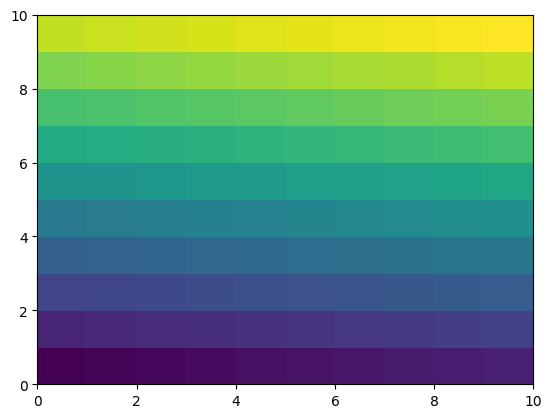

In [27]:
plt.pcolor(agm.map)
agm.expand()
plt.pcolor(agm.map)

adversaries = agm.polities['2'].expand(agm.map)
adversaries